<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/the-beauty-of-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
# Load the required packages
library(class)
library(tidyverse)
#library (dplyr)
#library(ggplot2)


# Assign the diamonds dataset to a simpler name and create price_bin variable
diamonds_df <- diamonds
diamonds_df <- diamonds_df %>%
  mutate(price_bin = if_else(price > mean(price), 1, 0)) %>%
  mutate(price_bin = as.factor(price_bin))

# Select just the required variables
diamonds_df <- diamonds_df %>%
  select(carat, depth, table, x, y, price_bin)

# Print the first few lines of the dataset
head(diamonds_df)

# Print the dimensions of the dataset
dim(diamonds_df)

Warning message:
“package ‘dplyr’ was built under R version 4.2.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

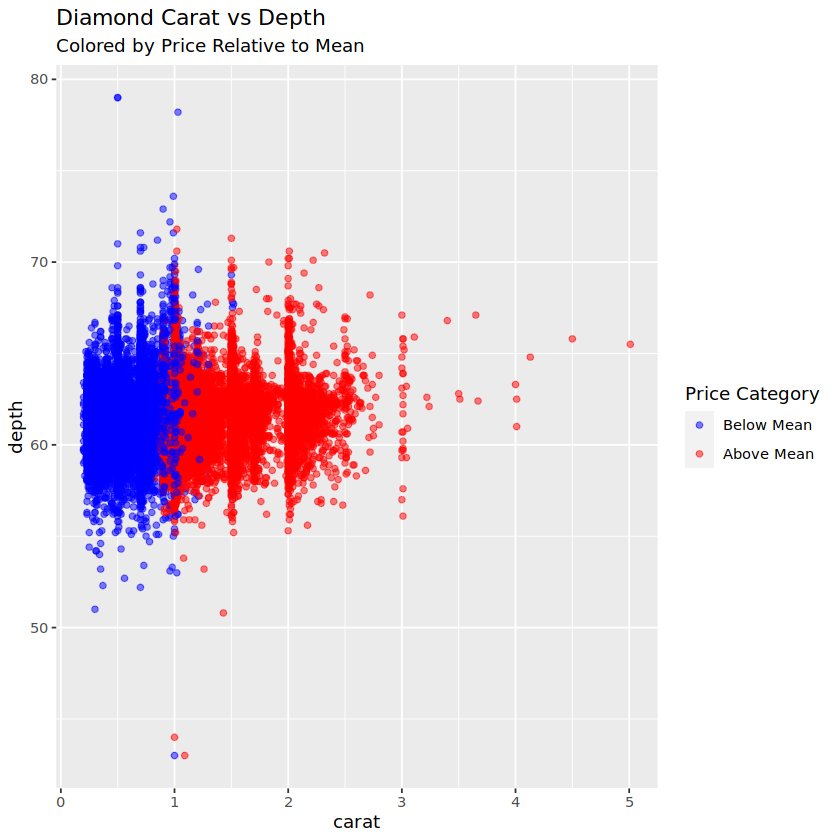

In [5]:
# Create a scatterplot
ggplot(diamonds_df, aes(x = carat, y = depth, color = price_bin)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = c("blue", "red"), 
                     labels = c("Below Mean", "Above Mean")) +
  labs(title = "Diamond Carat vs Depth",
       subtitle = "Colored by Price Relative to Mean",
       color = "Price Category")

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *Write response here*
>
> * 


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

# Create indices for the test set (30% of data)
test_indices <- sample(1:nrow(diamonds_df), size = round(0.3 * nrow(diamonds_df)))

# Create train and test sets
train_set <- diamonds_df[-test_indices, ]
test_set <- diamonds_df[test_indices, ]

# Print the first few lines of each set
head(train_set)
head(test_set)

# Print dimensions of each set
dim(train_set)
dim(test_set)

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0
0.24,62.3,57,3.95,3.98,0


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.22,62.3,56.0,6.81,6.84,1
1.57,62.3,56.0,7.48,7.41,1
1.11,62.4,57.7,6.57,6.64,1
0.42,60.6,57.0,4.82,4.85,0
0.32,62.6,55.0,4.39,4.36,0
0.90,62.7,58.0,6.06,6.15,1


[1] 37758     6

[1] 16182     6

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 

*Hint: Review the format required for the arguments of knn()*

In [10]:
set.seed(2023)

# Run KNN with carat and depth as predictors
knn_pred <- knn(
  train = train_set[, c("carat", "depth")],  # Training predictors
  test = test_set[, c("carat", "depth")],    # Test predictors
  cl = train_set$price_bin,                  # Training class labels
  k = 3                                      # Number of neighbors
)

Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [11]:
# Create confusion matrix
conf_matrix <- table(knn_pred, test_set$price_bin)
conf_matrix

# Calculate test error
test_error <- 1 - sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Test error rate:", round(test_error, 4))

        
knn_pred    0    1
       0 9707  316
       1  539 5620

Test error rate: 0.0528

How did your model perform?
>The model with  carat and depth performs well with a test error rate of only 5.28%, suggesting these two variables alone provide strong predictive power for diamond pricing.

Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [12]:
set.seed(2023)

# Run KNN with all available predictors
knn_pred_all <- knn(
  train = train_set[, c("carat", "depth", "table", "x", "y")],  # All training predictors
  test = test_set[, c("carat", "depth", "table", "x", "y")],    # All test predictors
  cl = train_set$price_bin,                                     # Training class labels
  k = 3                                                         # Number of neighbors
)

# Create confusion matrix
conf_matrix_all <- table(knn_pred_all, test_set$price_bin)
conf_matrix_all

# Calculate test error
test_error_all <- 1 - sum(diag(conf_matrix_all)) / sum(conf_matrix_all)
cat("Test error rate with all predictors:", round(test_error_all, 4))


            
knn_pred_all    0    1
           0 9728  391
           1  518 5545

Test error rate with all predictors: 0.0562

Did your model predictions improve?
> * The KNN model with all predictors actually performs slightly worse with a test error rate of 5.62%. Adding additional variables did not improve prediction accuracy.

# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- # your knn function here
    
    #overall error
    conf_df  <- # data frame of test predictions versus actual test
    output$error[k]  <- #calculate error from conf_df and add to your output dataframe
   
}
head(output)

Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

In [ ]:
# INSERT CODE HERE

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Write your response here*
>
> * 


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
#INSERT CODE HERE


What impact did rescaling the data have on your error rate?
> * *Write response here*
>
> * 


**DUE:** 11:59 pm March 19, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
